In [13]:
# import math

def solution(dimensions, your_position, trainer_position, distance):
    def getDistance(position1, position2):
        return math.sqrt((position1[0] - position2[0]) ** 2 + (position1[1] - position2[1]) ** 2)

    def getRootBearing(start, end):
        return math.atan2(end[1] - start[1], end[0] - start[0])

    def findMaxRoom(dimension, distance, your_position):
        a, b = your_position
        x, y = dimension
        roomsAboveX = (distance + b) // y + 1
        roomsRightY = (distance + a) // x + 1
        return max(roomsRightY, roomsAboveX)

    def getPosition(dimension, trainer_position, n):
        res = []
        a, b = trainer_position
        x, y = dimension
        if n % 2 == 0:
            res.extend([(-a - n * x, (n + 2) * y - b), ((n + 2) * x - a, (n + 2) * y - b), (-a - n * x, -b - n * y), ((n + 2) * x - a, -b - n * y), ((-a - n * x), b), (a, (n + 2) * y - b), ((n + 2) * x - a, b), (a, -b - n * y)])
        else:
            res.extend(
                [(a - (n + 1) * x, (n + 1) * y + b), ((n + 1) * x + a, (n + 1) * y + b), (a - (n + 1) * x, b - (n + 1) * y), ((n + 1) * x + a, b - (n + 1) * y), (a - (n + 1) * x, b), (a, (n + 1) * y + b), ((n + 1) * x + a, b), (a, b - (n + 1) * y)])
        while n > 0:
            if n % 2 == 1:
                res.extend(
                    [(-a - (n - 1) * x, res[0][1]), (res[0][0], (n + 1) * y - b), ((n + 1) * x - a, res[1][1]), (res[1][0], (n + 1) * y - b), (res[2][0], -b - (n - 1) * y), (-a - (n - 1) * x, res[2][1]), ((n + 1) * x - a, res[3][1]), (res[3][0], -b - (n - 1) * y)])
            else:
                res.extend([(a - n * x, res[0][1]), (res[0][0], n * y + b), (n * x + a, res[1][1]), (res[1][0], n * y + b), (res[2][0], b - n * y), (a - n * x, res[2][1]), (n * x + a, res[3][1]), (res[3][0], b - n * y)])
            n -= 1
        return res

    def checkPoint(your_position, position, dimension):
        x, y = dimension
        a1, b1 = position
        leftUp = getRootBearing(your_position, [0, y])
        rightDown = getRootBearing(your_position, [x, 0])
        leftDown = getRootBearing(your_position, [0, 0])
        rightUp = getRootBearing(your_position, [x, y])
    
        if a1 < 0 and b1 > 0 and getRootBearing(your_position, position) != leftUp:
            return True
        elif a1 > 0 and b1 > 0 and getRootBearing(your_position, position) != rightUp:
            return True
        elif a1 < 0 and b1 < 0 and getRootBearing(your_position, position) != leftDown:
            return True
        elif a1 > 0 and b1 < 0 and getRootBearing(your_position, position) != rightDown:
            return True
        else:
            return False

    if getDistance(your_position, trainer_position) > distance:
        return 0

    res = {getRootBearing(your_position, trainer_position): getDistance(your_position, trainer_position)}
    maxRoom = findMaxRoom(dimensions, distance, your_position)
    unique_directions = set()

    # check if the position is in the same direction as your_position mirroring
    for num in range(maxRoom):
        for position in getPosition(dimensions, your_position, num):
            if checkPoint(your_position, position, dimensions) and getDistance(your_position, position) < distance and getRootBearing(your_position, position) not in unique_directions:
                unique_directions.add(getRootBearing(your_position, position))

    # check every position of mirroring
    for num in range(maxRoom):
        for position in getPosition(dimensions, trainer_position, num):
            if checkPoint(your_position, position, dimensions) and getRootBearing(your_position, position) not in res and getDistance(your_position, position) <= distance and getRootBearing(your_position, position) not in unique_directions:
                res[getRootBearing(your_position, position)] = getDistance(your_position, position)
            elif getRootBearing(your_position, position) in unique_directions:
                if unique_directions[getRootBearing(your_position, position)] > getDistance(your_position, position):
                    res[getRootBearing(your_position, position)] = getDistance(your_position, position)

    return len(res)

print(solution([2, 2], [0, 1], [0, 0], 1))  # Output should be 1

1


In [52]:
import math

def solution(dimensions, your_position, trainer_position, distance):
    def getDistance(position1, position2):
        return math.sqrt((position1[0] - position2[0]) ** 2 + (position1[1] - position2[1]) ** 2)

    def getRootBearing(start, end):
        return math.atan2(end[1] - start[1], end[0] - start[0])

    def findMaxRoom(dimension, distance, your_position):
        a, b = your_position
        x, y = dimension
        roomsAboveX = (distance + b) // y + 1
        roomsRightY = (distance + a) // x + 1
        return max(roomsRightY, roomsAboveX)

    def getPosition(dimension, trainer_position, n):
        res = []
        a, b = trainer_position
        x, y = dimension
        if n % 2 == 0:
            res.extend([(-a - n * x, (n + 2) * y - b), ((n + 2) * x - a, (n + 2) * y - b), (-a - n * x, -b - n * y), ((n + 2) * x - a, -b - n * y), ((-a - n * x), b), (a, (n + 2) * y - b), ((n + 2) * x - a, b), (a, -b - n * y)])
        else:
            res.extend(
                [(a - (n + 1) * x, (n + 1) * y + b), ((n + 1) * x + a, (n + 1) * y + b), (a - (n + 1) * x, b - (n + 1) * y), ((n + 1) * x + a, b - (n + 1) * y), (a - (n + 1) * x, b), (a, (n + 1) * y + b), ((n + 1) * x + a, b), (a, b - (n + 1) * y)])
        while n > 0:
            if n % 2 == 1:
                res.extend(
                    [(-a - (n - 1) * x, res[0][1]), (res[0][0], (n + 1) * y - b), ((n + 1) * x - a, res[1][1]), (res[1][0], (n + 1) * y - b), (res[2][0], -b - (n - 1) * y), (-a - (n - 1) * x, res[2][1]), ((n + 1) * x - a, res[3][1]), (res[3][0], -b - (n - 1) * y)])
            else:
                res.extend([(a - n * x, res[0][1]), (res[0][0], n * y + b), (n * x + a, res[1][1]), (res[1][0], n * y + b), (res[2][0], b - n * y), (a - n * x, res[2][1]), (n * x + a, res[3][1]), (res[3][0], b - n * y)])
            n -= 1
        return res

    def checkPoint(your_position, position, dimension):
        x, y = dimension
        a1, b1 = position
        leftUp = getRootBearing(your_position, [0, y])
        rightDown = getRootBearing(your_position, [x, 0])
        leftDown = getRootBearing(your_position, [0, 0])
        rightUp = getRootBearing(your_position, [x, y])
        if position[0] != your_position[0] and position[1] != your_position[1]:
            if a1 < 0 and b1 > 0 and getRootBearing(your_position, position) != leftUp:
                return True
            elif a1 > 0 and b1 > 0 and getRootBearing(your_position, position) != rightUp:
                return True
            elif a1 < 0 and b1 < 0 and getRootBearing(your_position, position) != leftDown:
                return True
            elif a1 > 0 and b1 < 0 and getRootBearing(your_position, position) != rightDown:
                return True
            else:
                return False
        else:
            return False

    if getDistance(your_position, trainer_position) > distance:
        return 0

    res = {getRootBearing(your_position, trainer_position): getDistance(your_position, trainer_position)}
    maxRoom = findMaxRoom(dimensions, distance, your_position)
    unique_directions = set()

    # check if the position is in the same direction as your_position mirroring
    for num in range(maxRoom):
        for position in getPosition(dimensions, your_position, num):
            if checkPoint(your_position, position, dimensions) and getDistance(your_position, position) < distance and getRootBearing(your_position, position) not in unique_directions:
                unique_directions.add(getRootBearing(your_position, position))

    # check every position of mirroring
    for num in range(maxRoom):
        for position in getPosition(dimensions, trainer_position, num):
            if checkPoint(your_position, position, dimensions) and getRootBearing(your_position, position) not in res and getDistance(your_position, position) <= distance and getRootBearing(your_position, position) not in unique_directions:
                res[getRootBearing(your_position, position)] = getDistance(your_position, position)
            elif getRootBearing(your_position, position) in unique_directions:
                if res[getRootBearing(your_position, position)] > getDistance(your_position, position):
                    res[getRootBearing(your_position, position)] = getDistance(your_position, position)

    return len(res)

# Test case with your_position and trainer_position in opposite corners of a room,
# and distance that doesn't hit the trainer.
print(solution([5, 5], [0, 0], [4, 4], 9))  # Output should be 0

12


In [23]:
import math

def bounce_ball(xA, yA, xB, yB, G=500):
    ricochets = 0  # Inicializa o contador de ricochetes

    while True:
        # Verifica se o vetor direção é normalizado (magnitude 1)
        magnitude_B = math.sqrt(xB ** 2 + yB ** 2)
        if magnitude_B != 1:
            xB /= magnitude_B
            yB /= magnitude_B

        # Calcula a posição do ponto B no final do vetor direção G
        xB_end = xA + xB * G
        yB_end = yA + yB * G

        ricochet = False

        # Verifica se o ponto B ultrapassa os limites do plano cartesiano e reflete a direção
        if xB_end < 0 or xB_end > 300:
            xB = -xB
            ricochet = True
        if yB_end < 0 or yB_end > 250:
            yB = -yB
            ricochet = True

        # Calcula a nova posição da bola após o movimento
        xB_end = xA + xB * G
        yB_end = yA + yB * G

        if not ricochet:
            break

        ricochets += 1

    return ricochets, xB_end, yB_end

# Exemplo de uso:
xA, yA = 100, 200
xB, yB = 0.6, 0.8  # Vetor direção normalizado (magnitude 1)
G = 500
ricochets, x_final, y_final = bounce_ball(xA, yA, xB, yB, G)

print("Número de ricochetes:", ricochets)
print("Posição final da bola:", (x_final, y_final))

KeyboardInterrupt: 

## Check-Point 

In [53]:
import math

def solution(dimensions, your_position, trainer_position, distance):
    def getDistance(position1, position2):
        return math.sqrt((position1[0] - position2[0]) ** 2 + (position1[1] - position2[1]) ** 2)

    def getRootBearing(start, end):
        return math.atan2(end[1] - start[1], end[0] - start[0])

    def findMaxRoom(dimension, distance, your_position):
        a, b = your_position
        x, y = dimension
        roomsAboveX = (distance + b) // y + 1
        roomsRightY = (distance + a) // x + 1
        return max(roomsRightY, roomsAboveX)


    def getPosition(dimension, trainer_position, n):
        res = []
        a, b = trainer_position
        x, y = dimension
        if n % 2 == 0:
            res.extend([(-a - n * x, (n + 2) * y - b), ((n + 2) * x - a, (n + 2) * y - b), (-a - n * x, -b - n * y), ((n + 2) * x - a, -b - n * y), ((-a - n * x), b), (a, (n + 2) * y - b), ((n + 2) * x - a, b), (a, -b - n * y)])
        else:
            res.extend(
                [(a - (n + 1) * x, (n + 1) * y + b), ((n + 1) * x + a, (n + 1) * y + b), (a - (n + 1) * x, b - (n + 1) * y), ((n + 1) * x + a, b - (n + 1) * y), (a - (n + 1) * x, b), (a, (n + 1) * y + b), ((n + 1) * x + a, b), (a, b - (n + 1) * y)])
        while n > 0:
            if n % 2 == 1:
                res.extend(
                    [(-a - (n - 1) * x, res[0][1]), (res[0][0], (n + 1) * y - b), ((n + 1) * x - a, res[1][1]), (res[1][0], (n + 1) * y - b), (res[2][0], -b - (n - 1) * y), (-a - (n - 1) * x, res[2][1]), ((n + 1) * x - a, res[3][1]), (res[3][0], -b - (n - 1) * y)])
            else:
                res.extend([(a - n * x, res[0][1]), (res[0][0], n * y + b), (n * x + a, res[1][1]), (res[1][0], n * y + b), (res[2][0], b - n * y), (a - n * x, res[2][1]), (n * x + a, res[3][1]), (res[3][0], b - n * y)])
            n -= 1
        return res

    def checkPoint(your_position, position, dimension):
        x, y = dimension
        a1, b1 = position
        leftUp = getRootBearing(your_position, [0, y])
        rightDown = getRootBearing(your_position, [x, 0])
        leftDown = getRootBearing(your_position, [0, 0])
        rightUp = getRootBearing(your_position, [x, y])
        if position[0] != your_position[0] and position[1] != your_position[1]:
            if a1 < 0 and b1 > 0 and getRootBearing(your_position, position) != leftUp:
                return True
            elif a1 > 0 and b1 > 0 and getRootBearing(your_position, position) != rightUp:
                return True
            elif a1 < 0 and b1 < 0 and getRootBearing(your_position, position) != leftDown:
                return True
            elif a1 > 0 and b1 < 0 and getRootBearing(your_position, position) != rightDown:
                return True
            else:
                return False
        else:
            return False

    if getDistance(your_position, trainer_position) > distance:
        return 0


    res = {getRootBearing(your_position, trainer_position): getDistance(your_position, trainer_position)}
    maxRoom = findMaxRoom(dimensions, distance, your_position)
    unique_directions = set()

    # check if the position is in the same direction as your_position mirroring
    for num in range(maxRoom):
        for position in getPosition(dimensions, your_position, num):
            if checkPoint(your_position, position, dimensions) and getDistance(your_position, position) < distance and getRootBearing(your_position, position) not in unique_directions:
                unique_directions.add(getRootBearing(your_position, position))

    # check every position of mirroring
    for num in range(maxRoom):
        for position in getPosition(dimensions, trainer_position, num):
            if checkPoint(your_position, position, dimensions) and getRootBearing(your_position, position) not in res and getDistance(your_position, position) <= distance and getRootBearing(your_position, position) not in unique_directions:
                res[getRootBearing(your_position, position)] = getDistance(your_position, position)
            if getRootBearing(your_position, position) in unique_directions:
                if res[getRootBearing(your_position, position)] > getDistance(your_position, position):
                    res[getRootBearing(your_position, position)] = getDistance(your_position, position)

    return len(res)

# Test cases
print(solution([3, 2], [1, 1], [2, 1], 4 ))  # Output should be 7
print(solution([300, 275], [150, 150], [185, 100], 500))  # Output should be 9

7
9


In [8]:
import math

# Function to calculate mirror coordinates
def get_mirror_coordinates(room_dimensions, initial_position, reference_cg, num_layers):
    [room_width, room_height] = room_dimensions
    (initial_x, initial_y) = initial_position
    
    dx_right = (room_width - initial_x) * 2
    dx_left = initial_x * 2
    x_coordinates = [initial_x - reference_cg[0]] * (num_layers * 2 + 1)
    
    for i in range(num_layers + 1, num_layers * 2 + 1):
        x_coordinates[i] = x_coordinates[i - 1] + dx_right if (i - num_layers - 1) % 2 == 0 else x_coordinates[i - 1] + dx_left
        
    for i in range(num_layers - 1, -1, -1):
        x_coordinates[i] = x_coordinates[i + 1] - dx_left if (num_layers - 1 - i) % 2 == 0 else x_coordinates[i + 1] - dx_right
        
    dy_up = (room_height - initial_y) * 2
    dy_down = initial_y * 2
    y_coordinates = [initial_y - reference_cg[1]] * (num_layers * 2 + 1)
    
    for i in range(num_layers + 1, num_layers * 2 + 1):
        y_coordinates[i] = y_coordinates[i - 1] + dy_up if (i - num_layers - 1) % 2 == 0 else y_coordinates[i - 1] + dy_down
        
    for i in range(num_layers - 1, -1, -1):
        y_coordinates[i] = y_coordinates[i + 1] - dy_down if (num_layers - 1 - i) % 2 == 0 else y_coordinates[i + 1] - dy_up
        
    return x_coordinates, y_coordinates


def solution(dimensions, your_position, trainer_position, distance):
    player_position = (your_position[0], your_position[1])
    trainer_position = (trainer_position[0], trainer_position[1])
    
    min_dimension = min(dimensions)
    layer_count = (distance // min_dimension) + 1 
    
    player_x_coords, player_y_coords = get_mirror_coordinates(dimensions, player_position, player_position, layer_count)
    trainer_x_coords, trainer_y_coords = get_mirror_coordinates(dimensions, trainer_position, player_position, layer_count)
    
    angle_distance_map = {}
    
    for player_x in player_x_coords:
        for player_y in player_y_coords:
            if (player_x == 0 and player_y == 0):
                continue
            distance_to_origin = math.hypot(player_y, player_x)
            if distance_to_origin <= distance:
                beam_angle = math.atan2(player_y, player_x)
                if beam_angle in angle_distance_map:
                    if distance_to_origin < angle_distance_map[beam_angle]:
                        angle_distance_map[beam_angle] = distance_to_origin
                else:
                    angle_distance_map[beam_angle] = distance_to_origin
    
    unique_beam_angles = set()
    
    for trainer_x in trainer_x_coords:
        for trainer_y in trainer_y_coords:
            distance_to_origin = math.hypot(trainer_y, trainer_x)
            if distance_to_origin <= distance:
                beam_angle = math.atan2(trainer_y, trainer_x)
                if beam_angle in angle_distance_map:
                    if distance_to_origin < angle_distance_map[beam_angle]:
                        angle_distance_map[beam_angle] = distance_to_origin
                        unique_beam_angles.add(beam_angle)
                else:
                    angle_distance_map[beam_angle] = distance_to_origin
                    unique_beam_angles.add(beam_angle)
    
    return len(unique_beam_angles)


# Test cases
print(solution([3, 2], [1, 1], [2, 1], 4 ))  # Output should be 7
print(solution([300, 275], [150, 150], [185, 100], 500))  # Output should be 9

7
9


## First Aswer With All Cases Sucessfull

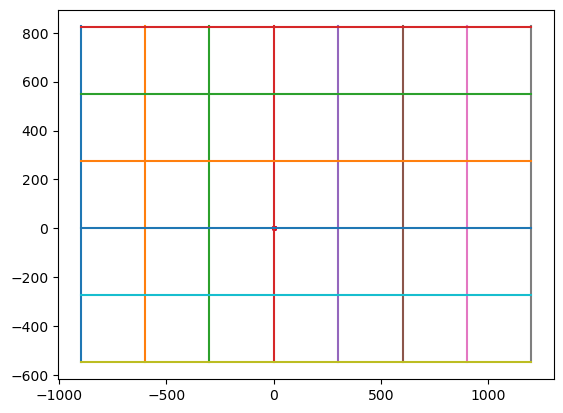

In [63]:
import math

def get_mirror_coordinates(size,pos,rel_cg,layer_count):
    [w,h] = size
    (px,py) = pos
    
    dxR = (w-px)*2
    dxL = px*2
    x= [px-rel_cg[0]]*(layer_count*2+1)
    for i in range(layer_count+1,layer_count*2+1):
        x[i] = x[i-1]+dxR if (i-layer_count-1)%2==0 else x[i-1]+dxL
    for i in range(layer_count-1,-1,-1):
        x[i] = x[i+1]-dxL if (layer_count-1-i)%2==0 else x[i+1]-dxR
        
    dyU = (h-py)*2 #275-100=175*2=350
    dyD = py*2
    y= [py-rel_cg[1]]*(layer_count*2+1)
    for i in range(layer_count+1,layer_count*2+1):
        y[i] = y[i-1]+dyU if (i-layer_count-1)%2==0 else y[i-1]+dyD
    for i in range(layer_count-1,-1,-1):
        y[i] = y[i+1]-dyD if (layer_count-1-i)%2==0 else y[i+1]-dyU

    return x,y

def solution(dimensions, your_position, trainer_position, distance):
    player_pos = (your_position[0],your_position[1])
    trainer_pos = (trainer_position[0], trainer_position[1])
    min_d = min(dimensions)
    layer_count = (distance//min_d)+1 

    px, py = get_mirror_coordinates(dimensions,player_pos,player_pos,layer_count)
    tx, ty = get_mirror_coordinates(dimensions,trainer_pos,player_pos,layer_count)

    angle_dist = {}
    
    for _x in px:
        for _y in py:
            if (_x==0 and _y==0):
                continue
            d = math.hypot(_y,_x)
            if d<=distance:
                beam =  math.atan2(_y, _x)
                if beam in angle_dist:                
                    if d<angle_dist[beam]:
                        angle_dist[beam] = d
                else:
                    angle_dist[beam] = d
    
    res = set()
    for _x in tx:
        for _y in ty:
            d = math.hypot(_y,_x)
            if d<=distance:
                beam =  math.atan2(_y, _x)
                if beam in angle_dist:
                    if d<angle_dist[beam]:
                        angle_dist[beam] = d
                        #res.add((_x,_y))
                        res.add(beam)
                        #print(f'({player_pos[0]+_x},{player_pos[1]+_y})')
                else:
                    angle_dist[beam] = d
                    res.add(beam)
                    #print(f'({player_pos[0]+_x},{player_pos[1]+_y})')
    #print(res)                
    return len(res)

import matplotlib.pyplot as plt
def test_draw():
    dimensions= [3,2]
    player_pos = (1,1)
    trainer_pos = (2,1)
    distance = 4
    layer_count = 2
    px, py = get_mirror_coordinates(dimensions,player_pos,(0,0),layer_count)
    tx, ty = get_mirror_coordinates(dimensions,trainer_pos,(0,0),layer_count)

    for x in range(-900,1201,300):
        plt.plot([x,x],[-550,826])
    for y in range(-550,827,275):
        plt.plot([-900,1200],[y,y])
        
    for _x in px:
        for _y in py:
            plt.scatter(_x,_y,c='blue',s=0.5) 
    for _x in tx:
        for _y in ty:
            plt.scatter(_x,_y,c='red',s=0.5) 
    plt.savefig('plot2.png', dpi=300)
if __name__=='__main__':
    #print(solution([3,2], [1,1], [2,1], 4))
    #print(solution([300,275], [150,150], [185,100], 500))
    test_draw()
    #print(solution([2,5], [1,2], [1,4], 11))
    #print(solution([10,10], [4,4], [3,3], 5000))